In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

# Wczytanie danych z pliku CSV
file_path = "IHME_HEALTH_SPENDING_1995_2018_Y2021M09D22.csv"  # Zmień na właściwą ścieżkę do pliku
data = pd.read_csv(file_path)

# Wybór kolumn do analizy
columns = ['location_id', 'location_name', 'iso3', 'level', 'year', 'the_total_mean', 
           'the_total_lower', 'the_total_upper', 'the_total_ppp_mean', 
           'the_total_ppp_lower', 'the_total_ppp_upper', 'ghes_total_mean']
data = data[columns]

# Usunięcie brakujących wartości
data = data.dropna()

# Podział na zmienne objaśniające i zmienną celu
X = data.drop(columns=['the_total_mean'])
y = data['the_total_mean']

# Zakodowanie zmiennych kategorycznych (jeśli istnieją)
X = pd.get_dummies(X, drop_first=True)

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizacja danych
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Porównanie wyników regresji liniowej, Ridge, sieci neuronowych

# Regresja liniowa na znormalizowanych danych
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

# Regresja Ridge na znormalizowanych danych
ridge = Ridge(alpha=10.0)  # Zwiększona wartość alpha dla stabilności
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Sieć neuronowa na znormalizowanych danych
nn = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=5000, random_state=42, early_stopping=True)
nn.fit(X_train_scaled, y_train)
y_pred_nn = nn.predict(X_test_scaled)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

# Wyniki
print("Regresja liniowa - MSE: ", mse_lr, " R2: ", r2_lr)
print("Regresja Ridge - MSE: ", mse_ridge, " R2: ", r2_ridge)
print("Sieć neuronowa - MSE: ", mse_nn, " R2: ", r2_nn)

Regresja liniowa - MSE:  10346825776.500288  R2:  0.99999994264602
Regresja Ridge - MSE:  51918364783323.31  R2:  0.999712208853279
Sieć neuronowa - MSE:  1.8484940689780765e+17  R2:  -0.0246475019739143


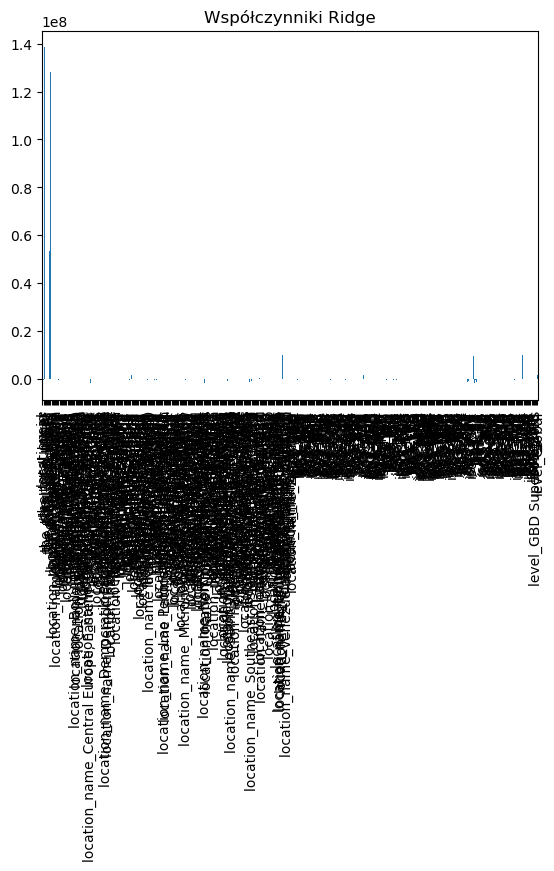

In [5]:
# 2. Analiza ważności cech w Ridge
coef = pd.Series(ridge.coef_, index=X.columns)
coef.plot(kind='bar', title='Współczynniki Ridge')
plt.show()

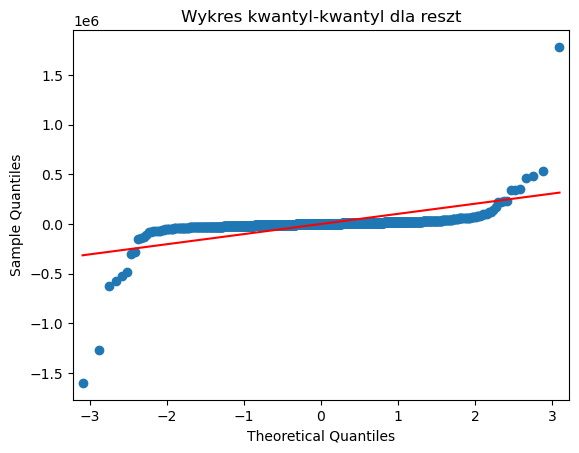

In [6]:
# 3. Analiza reszt dla modelu regresji liniowej

# Reszty
residuals = y_test - y_pred_lr

# Sprawdzenie normalności błędów
qqplot(residuals, line='s')
plt.title('Wykres kwantyl-kwantyl dla reszt')
plt.show()

In [7]:
# Test Durbin-Watson
dw_test = durbin_watson(residuals)
print("Statystyka Durbin-Watson: ", dw_test)

Statystyka Durbin-Watson:  1.978585794666752


In [8]:
# 4. Porównanie jakości modeli przy użyciu danych o różnych skalach

# Wyniki dla znormalizowanych danych
print("Regresja liniowa (znormalizowane) - MSE: ", mse_lr, " R2: ", r2_lr)
print("Regresja Ridge (znormalizowane) - MSE: ", mse_ridge, " R2: ", r2_ridge)
print("Sieć neuronowa (znormalizowane) - MSE: ", mse_nn, " R2: ", r2_nn)

Regresja liniowa (znormalizowane) - MSE:  10346825776.500288  R2:  0.99999994264602
Regresja Ridge (znormalizowane) - MSE:  51918364783323.31  R2:  0.999712208853279
Sieć neuronowa (znormalizowane) - MSE:  1.8484940689780765e+17  R2:  -0.0246475019739143
